In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Titanic호에 탑승한 탑승객의 정보를 통해서 사고 당시 생존여부를 예측하는 모델을 만든다
- 생존 : 1
- 사망 : 0

- 불연속값 예측 => 지도학습 중 분류 분석(classification)

In [2]:
#1. 데이터 확보

titanic = pd.read_csv('C:\\Users\\M\\Machine_L\\data\\titanic_train.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#2. 데이터 전처리
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
#2-1 nan값 처리
titanic.isnull().sum()
titanic.drop('Cabin', axis = 1, inplace = True) #Cabin컬럼에 nan값이 너무 많아서
#titanic.Age.fillna() #Age 컬럼은 살릴거임, nan값 채우기는 분석가 마음대로


In [5]:
titanic.groupby('Pclass').Age.mean()

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

#### transform 함수
grouped = df.groupby('col')\
grouped.agg({'col1':'np.mean'}) #그룹별로 값을 계산해서 출력\
grouped.col1.transform('집계함수') #특정 컬럼의 값을 그룹의 값으로 바꿈

In [6]:
L = []

for c , a in zip(titanic.Pclass, titanic.Age):
    # print(i, j)
    if np.isnan(a):
        if c == 1:
            L.append(38)
        elif c == 2:
            L.append(29)
        else:
            L.append(25)
    else:
        L.append(a)

In [7]:
titanic.Age = L

In [8]:
#Embarked에 남아있는 nan값을 포함한 row 2개는 삭제

In [9]:
titanic.dropna(inplace = True)

In [10]:
# 필요없는 컬럼 삭제

In [11]:
titanic.drop(columns = ['PassengerId','Name','Ticket'], inplace = True)

In [12]:
# 문자열 컬럼을 숫자로 전환시키는 함수 => pd.get_dummies()

In [13]:
# pd.get_dummies(titanic)['Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S']

In [14]:
#onehot encoding
titanic_ohe = pd.get_dummies(titanic, dtype = 'int')
titanic_ohe.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [15]:
#label encoding
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# le.fit(titanic)

<Axes: xlabel='Survived', ylabel='count'>

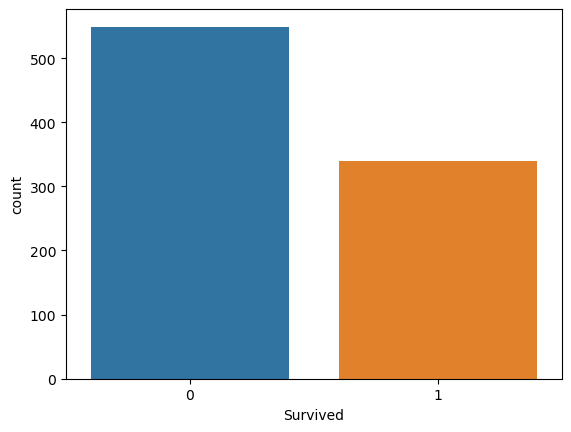

In [16]:
sns.countplot(x = 'Survived', data = titanic_ohe)

C:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


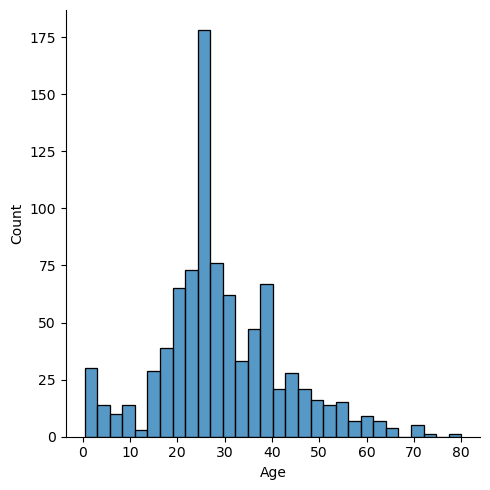

In [17]:
sns.displot(titanic_ohe.Age, bins = 30)

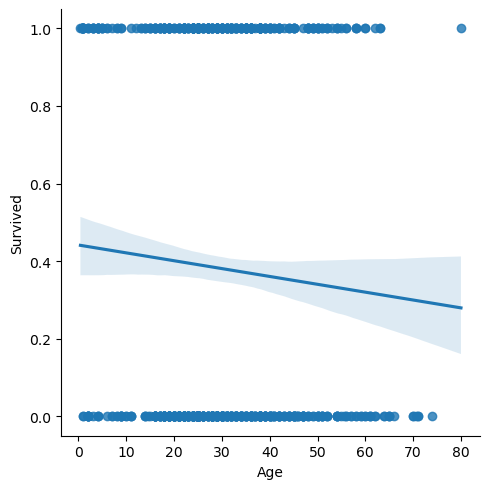

In [18]:
sns.lmplot(x = 'Age', y = 'Survived', data = titanic_ohe)

In [19]:
#4. target 데이터 정의
y = titanic_ohe.Survived
X = titanic_ohe.drop('Survived', axis = 1)

In [20]:
#5. train, test 데이터 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2024)

In [21]:
#6. 학습시킬 알고리즘 가져오기
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()

In [22]:
#7. 학습진행
log.fit(X_train, y_train)

C:\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [23]:
#8. 테스트 데이터 학습
pred = log.predict(X_test)

In [24]:
#9.모델 평가
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
cm = confusion_matrix(y_test, pred)
ac = accuracy_score(y_test, pred)
ps = precision_score(y_test, pred)
rs = recall_score(y_test, pred)
fs = f1_score(y_test, pred)

print('accuracy_score : ', ac)
print('precision_score : ', ps)
print('recall_score : ', rs)
print('f1_score : ', fs)

accuracy_score :  0.7865168539325843
precision_score :  0.8305084745762712
recall_score :  0.6363636363636364
f1_score :  0.7205882352941178


In [25]:
np.mean(pred == y_test.values)

0.7865168539325843

In [26]:
import sklearn
dir(sklearn.metrics)

['ConfusionMatrixDisplay',
 'DetCurveDisplay',
 'DistanceMetric',
 'PrecisionRecallDisplay',
 'PredictionErrorDisplay',
 'RocCurveDisplay',
 'SCORERS',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_base',
 '_classification',
 '_dist_metrics',
 '_pairwise_distances_reduction',
 '_pairwise_fast',
 '_plot',
 '_ranking',
 '_regression',
 '_scorer',
 'accuracy_score',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'auc',
 'average_precision_score',
 'balanced_accuracy_score',
 'brier_score_loss',
 'calinski_harabasz_score',
 'check_scoring',
 'class_likelihood_ratios',
 'classification_report',
 'cluster',
 'cohen_kappa_score',
 'completeness_score',
 'confusion_matrix',
 'consensus_score',
 'coverage_error',
 'd2_absolute_error_score',
 'd2_pinball_score',
 'd2_tweedie_score',
 'davies_bouldin_score',
 'dcg_score',
 'det_curve',
 'euclidean_distances',
 'explained_variance_score',
 'f1_

In [ ]:
print(classification_report(y_test, pred))

## roc
#predict_prob:label로 전환하기 전의 sigmoid 함수값(확률값)으로 출력
from sklearn.metrics import roc_auc_score
proba = log.predict_proba(X_test)[:, 1]